# Topic Modeling for Abstracts using Latent Dirichlet Allocation (lda)

# Table of content:
* Load The Dataset
* Explore The Dataset
* Data Preprocessing:
  * Tokenization
  * lemmatization
  * Stemming
* Feature Extraction 
  * Build Dictionary from the Preprocessed Docs
  * BOW Bag of Words
  * TFIDF
* LDA Training and choosing the optimal number of topics 
* Transform The TFIDF Corpus using the new model 
* Build `new_df` that has the original top 3 topics with probability scores
* Load the newly created df and The topic and top words df.



##  Load The Dataset

In [1]:
import pandas as pd

In [2]:
df=pd.read_excel('Pubmed5k.xlsx')

In [7]:
df.head(5)

ArticleID                                              Title  \
0   34153941  Stable Coordination Variability in Overground ...   
1   34153942  Weak Hip Strength Increases Dynamic Knee Valgu...   
2   34153964  Current and Future Projections of Amyotrophic ...   
3   34153968  Disparities between Asian and Non-Asian Thromb...   
4   34153978  Maternal Factors Predicting Loss to Follow-Up ...   

                                            Abstract  
0  Coordination variability (CV) is commonly anal...  
1  Clinical Scenario: Dynamic knee valgus (DKV) i...  
2  Various methodologies have been reported to as...  
3  As outcomes for acute ischemic stroke (AIS) va...  
4  Because hearing loss in children can result in...

## Explore The Dataset

To see if there are any null values and reading some examples to see what may cause problems.

In [9]:
print("the length of the dataset is #{}".format(len(df)))
print("-"*100)
df.info()

the length of the dataset is #4999
----------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ArticleID  4999 non-null   int64 
 1   Title      4999 non-null   object
 2   Abstract   4999 non-null   object
dtypes: int64(1), object(2)
memory usage: 117.3+ KB


No null values

In [8]:
df['Abstract'][1]

'Clinical Scenario: Dynamic knee valgus (DKV) is a mechanical alteration in the knee that leads to increased risk of injury. Weakness of hip musculature in hip abduction (HABD), extension (HEXT), and external rotation (HER) may contribute to increased DKV in single-leg landing tasks. Focused Clinical Question: Is decreased hip strength associated with an increase in DKV during a single-leg landing task in collegiate female athletes? Summary of Key Findings: Three studies were included: One randomized control trial (RCT), one cohort study, and one case-control. All three studies found that decreases in HABD and HER strength contributed to increased DKV during single-leg landing tasks. One study also found that the hip extensors contribute to controlling hip adduction, a common factor in many mechanisms of injuries. These three studies recommended strengthening HABD, HEXT, and HER to decrease DKV and reduce the risk of injury at the knee. Clinical Bottom Line: Weak HABD, HEXT, and HER co

## Data Preprocessing ##

We will perform the following steps:

* **Tokenization**: Split the text into sentences and the sentences into words. Lowercase the words and remove punctuation.
* Words that have fewer than 3 characters are removed.
* All **stopwords** are removed.
* Words are **lemmatized** - words in third person are changed to first person and verbs in past and future tenses are changed into present.
* Words are **stemmed** - words are reduced to their root form.


In [10]:
'''
Loading Gensim and nltk libraries
'''
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import PorterStemmer
import numpy as np
import nltk
nltk.download('wordnet')
print("-"*100)
print("All Done!")

----------------------------------------------------------------------------------------------------
All Done!


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Eslam\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [11]:
'''
These two functions take care of the preprocessing process mentioned above.
Input  >>>> text
output >>>> stemmed and lemmatized tokens
'''
def lemmatize_stemming(text):
    return PorterStemmer().stem(WordNetLemmatizer().lemmatize(text, pos='v'))
# Tokenize and lemmatize
def preprocess(text):
    result=[]
    for token in gensim.utils.simple_preprocess(text) :
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            # Apply lemmatize_stemming on the token, then add to the results list
            result.append(lemmatize_stemming(token))
    return result

In [12]:
# preprocess all the abstracts, saving the list of results as 'processed_docs'
processed_docs = df['Abstract'].map(preprocess)

In [13]:
# Compute bigrams.
from gensim.models import Phrases

# Add bigrams to docs (only ones that appear 10 times or more).
bigram = Phrases(processed_docs, min_count=10)
for idx in range(len(processed_docs)):
    for token in bigram[processed_docs[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            processed_docs[idx].append(token)

In [15]:
processed_docs[1]

['clinic',
 'scenario',
 'dynam',
 'knee',
 'valgu',
 'mechan',
 'alter',
 'knee',
 'lead',
 'increas',
 'risk',
 'injuri',
 'weak',
 'musculatur',
 'abduct',
 'habd',
 'extens',
 'hext',
 'extern',
 'rotat',
 'contribut',
 'increas',
 'singl',
 'land',
 'task',
 'focu',
 'clinic',
 'question',
 'decreas',
 'strength',
 'associ',
 'increas',
 'singl',
 'land',
 'task',
 'collegi',
 'femal',
 'athlet',
 'summari',
 'find',
 'studi',
 'includ',
 'random',
 'control',
 'trial',
 'cohort',
 'studi',
 'case',
 'control',
 'studi',
 'decreas',
 'habd',
 'strength',
 'contribut',
 'increas',
 'singl',
 'land',
 'task',
 'studi',
 'extensor',
 'contribut',
 'control',
 'adduct',
 'common',
 'factor',
 'mechan',
 'injuri',
 'studi',
 'recommend',
 'strengthen',
 'habd',
 'hext',
 'decreas',
 'reduc',
 'risk',
 'injuri',
 'knee',
 'clinic',
 'line',
 'weak',
 'habd',
 'hext',
 'contribut',
 'increas',
 'colleg',
 'femal',
 'athlet',
 'strengthen',
 'habd',
 'hext',
 'lead',
 'decreas',
 'overal'

## Bag of words on the dataset

Now let's create a dictionary from 'processed_docs' containing the number of times a word appears in the training set. To do that, let's pass `processed_docs` to [`gensim.corpora.Dictionary()`](https://radimrehurek.com/gensim/corpora/dictionary.html) and call it '`dictionary`'.

In [16]:
'''
Create a dictionary from 'processed_docs' containing the number of times a word appears 
in the training set using gensim.corpora.Dictionary'
'''
dictionary = gensim.corpora.Dictionary(processed_docs)
'''
Checking dictionary created
'''
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

0 achiev
1 analyz
2 approach
3 averag
4 awar
5 calcul
6 captur
7 cod
8 commonli
9 compar
10 consequ


** Gensim filter_extremes **

[`filter_extremes(no_below=5, no_above=0.5, keep_n=100000)`](https://radimrehurek.com/gensim/corpora/dictionary.html#gensim.corpora.dictionary.Dictionary.filter_extremes)

Filter out tokens that appear in

* less than no_below documents (absolute number) or
* more than no_above documents (fraction of total corpus size, not absolute number).
* after (1) and (2), keep only the first keep_n most frequent tokens (or keep all if None).

In [17]:
'''
Remove very rare and very common words:
- words appearing less than 20 times
- words appearing in more than 50% of all documents
'''
# Filter out words that occur less than 30 documents, or more than 60% of the documents.
dictionary.filter_extremes(no_below=30, no_above=0.6)

In [18]:
'''
Create the Bag-of-words model for each document i.e for each document we create a dictionary reporting how many
words and how many times those words appear. Save this to 'bow_corpus'
'''
bow_corpus =[dictionary.doc2bow(doc) for doc in processed_docs]

# TF-IDF Term Frequency, Inverse Document Frequency

In [19]:
'''
Create tf-idf model object using models.TfidfModel on 'bow_corpus' and save it to 'tfidf'
'''
from gensim import corpora, models
tfidf = models.TfidfModel(bow_corpus)

In [20]:
'''
Apply transformation to the entire corpus and call it 'corpus_tfidf'
'''
corpus_tfidf = tfidf[bow_corpus]

In [21]:
from pprint import pprint
for doc in corpus_tfidf:
    pprint(doc)
    break

[(0, 0.060113494690859914),
 (1, 0.04680615084381463),
 (2, 0.04628691906351679),
 (3, 0.066147929216438),
 (4, 0.08381017853904311),
 (5, 0.1334085058202104),
 (6, 0.09082272921085896),
 (7, 0.1747939085115589),
 (8, 0.07741437419506485),
 (9, 0.03154396981513048),
 (10, 0.07348448855134807),
 (11, 0.09421472526153225),
 (12, 0.1743090892716878),
 (13, 0.04191995863527967),
 (14, 0.029204327238307046),
 (15, 0.05409454287837028),
 (16, 0.09169648898288094),
 (17, 0.06464499690209731),
 (18, 0.09744811702289163),
 (19, 0.04429254270529809),
 (20, 0.19190257329021007),
 (21, 0.05312273951729488),
 (22, 0.07297696984663747),
 (23, 0.07026887912489209),
 (24, 0.04832175702136681),
 (25, 0.04733811461118962),
 (26, 0.08831847400006304),
 (27, 0.09199574111043128),
 (28, 0.09053912471130397),
 (29, 0.2073790096111362),
 (30, 0.09795105917194913),
 (31, 0.15291875775788527),
 (32, 0.1964742577862155),
 (33, 0.19567807268555706),
 (34, 0.07128869567479644),
 (35, 0.09523989716636776),
 (36, 0

# LDA Finding the optimal number of topics
Finding the optimal number of topics in a topic model is tough, given that it is like a model hyperparameter that you always have to set before training the model. We can use an iterative approach and build several models with differing numbers of topics and select the one that has the highest coherence score.
for more on Coherence score please refer to this [link]("https://towardsdatascience.com/evaluate-topic-model-in-python-latent-dirichlet-allocation-lda-7d57484bb5d0").


In [22]:
def topic_model_coherence_generator(corpus, texts, dictionary, 
                                    start_topic_count=2, end_topic_count=10, step=1):
    """
    This function trains many lda models using different topic numbers and calculates the coherence
    score for each model. It then stores the output of each model.
    Inputs
    1- corpus >>>> Bag of words or tfidf corpus
    2- texts  >>>> Preprocessed Docs
    3- dictionary >>>> the one created from the preprocessed docs
    4- start_topic_count int >>> the number of topics to start the training with if none the default is 2.
    5- end_topic_count int   >>> the number of topics to end the training with if none the default is 10.
    6- step int >>>> to increment the count
    Outputs
    1- a list of the trained models.
    2-a list of the coherence scores for each model.
    """
    models = []
    coherence_scores = []
    
    for topic_nums in range(start_topic_count, end_topic_count+1, step):
        
        lda_model = gensim.models.LdaModel(corpus, 
                                             num_topics=topic_nums, 
                                             id2word = dictionary,  
                                             alpha='auto',
                                             eta='auto')
                                             
        cv_coherence_model_lda = gensim.models.CoherenceModel(model=lda_model, corpus=corpus, 
                                                                     texts=texts, dictionary=dictionary, 
                                                                     coherence='c_v')
        coherence_score = cv_coherence_model_lda.get_coherence()
        
        coherence_scores.append(coherence_score)
        
        models.append(lda_model)
    
    return models, coherence_scores

In [23]:
lda_models, coherence_scores = topic_model_coherence_generator(corpus=corpus_tfidf, texts=processed_docs,
                                                               dictionary=dictionary, start_topic_count=1,
                                                               end_topic_count=50, step=1)

In [24]:
coherence_df = pd.DataFrame({'Number of Topics': range(1, 51, 1),
                             'Coherence Score': np.round(coherence_scores, 4)})
coherence_df=coherence_df.sort_values(by=['Number of Topics'], ascending=True)
coherence_df.head()

Number of Topics  Coherence Score
0                 1           0.2405
1                 2           0.2512
2                 3           0.3501
3                 4           0.4763
4                 5           0.4169

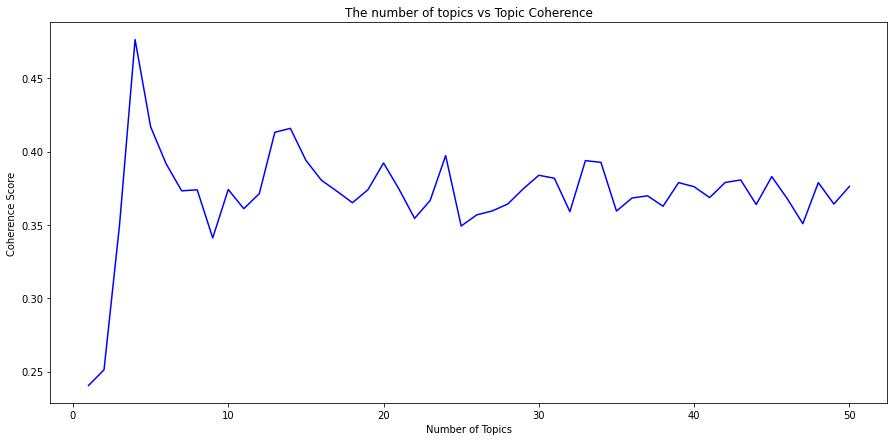

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline
x_ax = coherence_df['Number of Topics']
y_ax = coherence_df['Coherence Score']
plt.figure(figsize=(15, 7));
plt.plot(x_ax, y_ax, c='b');
xl = plt.xlabel('Number of Topics');
yl = plt.ylabel('Coherence Score');
plt.title("The number of topics vs Topic Coherence");

# Final Model
Let’s train the final model using the above selected parameters

In [26]:
num_of_topics=coherence_df['Number of Topics'].values[coherence_df['Coherence Score']==np.max(coherence_df['Coherence Score'])]
print("The optimal number of topics are {} topics".format(int(num_of_topics)))

The optimal number of topics are 4 topics


In [27]:
# Train a new model with the optimal number of topics
lda_model =gensim.models.LdaModel(corpus_tfidf, 
                                             num_topics=4, 
                                             id2word = dictionary,  
                                             alpha='auto',
                                             eta='auto')

In [28]:
lda_model.show_topics(num_topics=4, num_words=10)

[(0,
  '0.006*"health" + 0.004*"covid" + 0.004*"care" + 0.003*"pandem" + 0.003*"commun" + 0.003*"social" + 0.003*"research" + 0.003*"patient" + 0.003*"particip" + 0.003*"model"'),
 (1,
  '0.009*"patient" + 0.005*"cancer" + 0.005*"cell" + 0.004*"covid" + 0.004*"infect" + 0.004*"tumor" + 0.004*"risk" + 0.004*"treatment" + 0.003*"associ" + 0.003*"diseas"'),
 (2,
  '0.004*"group" + 0.003*"patient" + 0.003*"cell" + 0.003*"implant" + 0.003*"effect" + 0.003*"bone" + 0.003*"treatment" + 0.003*"method" + 0.003*"activ" + 0.002*"differ"'),
 (3,
  '0.010*"speci" + 0.004*"genu" + 0.004*"cell" + 0.003*"describ" + 0.003*"distribut" + 0.003*"water" + 0.002*"viru" + 0.002*"river" + 0.002*"brain" + 0.002*"region"')]

In [29]:
'''
For each topic, we will explore the words occuring in that topic and its relative weight
'''
for idx, topic in lda_model.print_topics(-1):
    print("Topic: {} Word: {}".format(idx, topic))
    print("\n")

Topic: 0 Word: 0.006*"health" + 0.004*"covid" + 0.004*"care" + 0.003*"pandem" + 0.003*"commun" + 0.003*"social" + 0.003*"research" + 0.003*"patient" + 0.003*"particip" + 0.003*"model"


Topic: 1 Word: 0.009*"patient" + 0.005*"cancer" + 0.005*"cell" + 0.004*"covid" + 0.004*"infect" + 0.004*"tumor" + 0.004*"risk" + 0.004*"treatment" + 0.003*"associ" + 0.003*"diseas"


Topic: 2 Word: 0.004*"group" + 0.003*"patient" + 0.003*"cell" + 0.003*"implant" + 0.003*"effect" + 0.003*"bone" + 0.003*"treatment" + 0.003*"method" + 0.003*"activ" + 0.002*"differ"


Topic: 3 Word: 0.010*"speci" + 0.004*"genu" + 0.004*"cell" + 0.003*"describ" + 0.003*"distribut" + 0.003*"water" + 0.002*"viru" + 0.002*"river" + 0.002*"brain" + 0.002*"region"




In [52]:
topics = [[(term, round(wt, 3)) 
               for term, wt in lda_model.show_topic(n, topn=50)] 
                   for n in range(0, lda_model.num_topics)]
for idx, topic in enumerate(topics):
    print('Topic #'+str(idx)+':')
    print([term for term, wt in topic])
    print()

Topic #0:
['health', 'covid', 'care', 'pandem', 'commun', 'social', 'research', 'patient', 'particip', 'model', 'data', 'risk', 'mental', 'servic', 'studi', 'speci', 'nurs', 'base', 'public', 'work', 'provid', 'effect', 'develop', 'factor', 'relat', 'activ', 'identifi', 'support', 'inform', 'gene', 'student', 'experi', 'healthcar', 'review', 'analysi', 'associ', 'qualiti', 'practic', 'differ', 'emot', 'chang', 'manag', 'mental_health', 'intervent', 'medic', 'impact', 'assess', 'design', 'level', 'peopl']

Topic #1:
['patient', 'cancer', 'cell', 'covid', 'infect', 'tumor', 'risk', 'treatment', 'associ', 'diseas', 'sar', 'case', 'year', 'clinic', 'mortal', 'group', 'level', 'serum', 'sever', 'gene', 'protein', 'express', 'factor', 'studi', 'symptom', 'treat', 'therapi', 'diagnosi', 'month', 'induc', 'rat', 'effect', 'liver', 'score', 'surviv', 'outcom', 'follow', 'predict', 'acut', 'high', 'diabet', 'identifi', 'compar', 'present', 'perform', 'show', 'increas', 'analysi', 'includ', 'repo

In [53]:
pd.set_option('display.max_colwidth', -1)
topics_df = pd.DataFrame([', '.join([term for term, wt in topic])  
                              for topic in topics],
                         columns = ['Terms per Topic'],
                         index=['Topic'+str(t) for t in range(0, lda_model.num_topics)]
                         )
topics_df

<ipython-input-53-0df6d503e98d>:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


Terms per Topic
Topic0  health, covid, care, pandem, commun, social, research, patient, particip, model, data, risk, mental, servic, studi, speci, nurs, base, public, work, provid, effect, develop, factor, relat, activ, identifi, support, inform, gene, student, experi, healthcar, review, analysi, associ, qualiti, practic, differ, emot, chang, manag, mental_health, intervent, medic, impact, assess, design, level, peopl
Topic1  patient, cancer, cell, covid, infect, tumor, risk, treatment, associ, diseas, sar, case, year, clinic, mortal, group, level, serum, sever, gene, protein, express, factor, studi, symptom, treat, therapi, diagnosi, month, induc, rat, effect, liver, score, surviv, outcom, follow, predict, acut, high, diabet, identifi, compar, present, perform, show, increas, analysi, includ, report                
Topic2  group, patient, cell, implant, effect, bone, treatment, method, activ, differ, detect, water, fractur, control, increas, surfac, function, concentr, measur, test, time, perform, depress, result, level, studi, sampl, clinic, compar, vaccin, process, evalu, assess, show, base, pain, model, children, intervent, protein, women, develop, high, signific, year, imag, score, review, reduc, muscl       
Topic3  speci, genu, cell, describ, distribut, water, viru, river, brain, region, task, plant, exposur, present, provid, research, base, detect, develop, human, sampl, differ, function, protein, infect, type, effect, structur, process, model, field, data, genet, popul, time, import, know, imag, activ, male, understand, result, studi, area, habitat, review, method, posit, china, root

In [74]:
topics_df.to_csv('topic_description.csv')

In [34]:
doc_lda=lda_model[corpus_tfidf]

In [39]:
doc_lda[6]

[(0, 0.021147216), (1, 0.46876714), (2, 0.019274607), (3, 0.49081108)]

In [40]:
corpus_topics = [sorted(topics, key=lambda record: -record[1])
                     for topics in doc_lda]


In [42]:
corpus_topics[2]

[(0, 0.93822306), (2, 0.023381349), (1, 0.020332383), (3, 0.018063236)]

In [49]:
new_df=pd.DataFrame(columns=['ArticleID','Title','Abstract','Topic_1',"Topic_1_score",'Topic_2',"Topic_2_score",'Topic_3',"Topic_3_score"])
for i in range(len(df)):
    if len(corpus_topics[i])>=3:
        new_df = new_df.append({'ArticleID':df["ArticleID"][i],'Title':df["Title"][i],'Abstract':df["Abstract"][i],'Topic_1':corpus_topics[i][0][0],
                                'Topic_1_score':corpus_topics[i][0][1],
                                'Topic_2':corpus_topics[i][1][0],
                                'Topic_2_score':corpus_topics[i][1][1],
                               'Topic_3':corpus_topics[i][2][0],
                               'Topic_3_score':corpus_topics[i][2][1]},
                               ignore_index=True)
    elif len(corpus_topics[i])==2:
        new_df = new_df.append({'ArticleID':df["ArticleID"][i],'Title':df["Title"][i],'Abstract':df["Abstract"][i],'Topic_1':corpus_topics[i][0][0],
                        'Topic_1_score':corpus_topics[i][0][1],
                        'Topic_2':corpus_topics[i][1][0],
                        'Topic_2_score':corpus_topics[i][1][1],
                               'Topic_3':np.nan,
                               'Topic_3_score':np.nan},
                       ignore_index=True)
    else:
        new_df = new_df.append({'ArticleID':df["ArticleID"][i],'Title':df["Title"][i],'Abstract':df["Abstract"][i],'Topic_1':corpus_topics[i][0][0],
                                    'Topic_1_score':corpus_topics[i][0][1],
                                    'Topic_2':np.nan,
                                    'Topic_2_score':np.nan,
                                   'Topic_3':np.nan,
                                   'Topic_3_score':np.nan},
                                   ignore_index=True)       

In [50]:
new_df.head()

ArticleID  \
0  34153941   
1  34153942   
2  34153964   
3  34153968   
4  34153978   

                                                                                                                                                        Title  \
0  Stable Coordination Variability in Overground Walking and Running at Preferred and Fixed Speeds.                                                             
1  Weak Hip Strength Increases Dynamic Knee Valgus in Single-Leg Tasks of Collegiate Female Athletes.                                                           
2  Current and Future Projections of Amyotrophic Lateral Sclerosis in the United States Using Administrative Claims Data.                                       
3  Disparities between Asian and Non-Asian Thrombolyzed Acute Ischemic Stroke Patients in the Enhanced Control of Hypertension and Thrombolysis Stroke Trial.   
4  Maternal Factors Predicting Loss to Follow-Up from Newborn Hearing Screenings in New Jersey.                                                                 

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   Abstract  \
0  Coordination variability (CV) is commonly analyzed to understand dynamical qualities of human locomotion. The purpose of this study was to develop guidelines for the number of trials required to inform the calculation of a stable mean lower limb CV during overground locomotion. Three-dimensional lower limb kinematics were captured for 10 recreational runners performing 20 trials each of preferred and fixed speed walking and running. Stance phase CV was calculated for 9 segment and joint couplings using a modified vector coding technique. The number of trials required to achieve a CV mean within 10% of 20 strides av

In [45]:
len(new_df)

4999

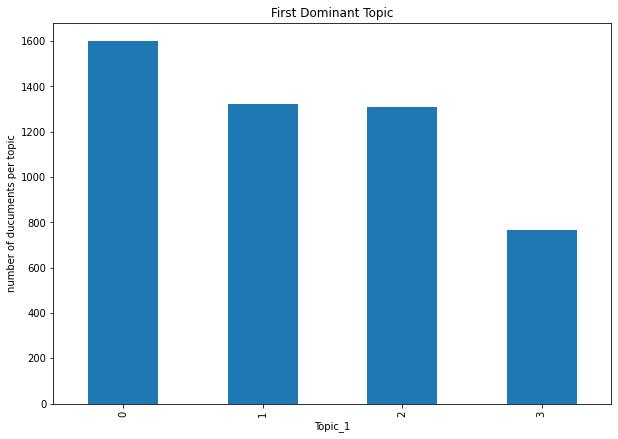

In [73]:
plt.figure(figsize=(10, 7));
plt.ylabel('number of ducuments per topic');
plt.title("First Dominant Topic");
new_df.groupby(['Topic_1'])['Abstract'].count().plot(kind='bar');


In [104]:
from gensim.test.utils import datapath
# Save model to disk.
temp_file = datapath("D:\Educational Stuff\Degrees\Projects\Topic Modeling\model\model")
lda_model.save(temp_file)

In [82]:
new_df.to_csv("clustered_topics.csv")